# Exploring the Data set

Begin by importing the data from the `./data_sets` directory

In [1]:
path <- './data_sets'
setwd(path)
train <- read.csv('train.csv')
test <- read.csv('test.csv')

Let's begin exploring the data sets. The `train` data set is used to train models.

In [2]:
dim(train)

[1] 8523   12

As you can see there are 12 features and 8523 instances in the data set. 11 independent (predictor) variables and one dependent (response) variable.

The independent (predictor) variable is named `Item_Outlet_Sales`.

In [3]:
dim(test)

[1] 5681   11

In the test data set there ae only 11 features. This is because it does not contain the dependent (response) variable.

Let us take a look at the structure of the features.

In [4]:
str(train)

'data.frame':	8523 obs. of  12 variables:
 $ Item_Identifier          : Factor w/ 1559 levels "DRA12","DRA24",..: 157 9 663 1122 1298 759 697 739 441 991 ...
 $ Item_Weight              : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content         : Factor w/ 5 levels "LF","low fat",..: 3 5 3 5 3 5 5 3 5 5 ...
 $ Item_Visibility          : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type                : Factor w/ 16 levels "Baking Goods",..: 5 15 11 7 10 1 14 14 6 6 ...
 $ Item_MRP                 : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Identifier        : Factor w/ 10 levels "OUT010","OUT013",..: 10 4 10 1 2 4 2 6 8 3 ...
 $ Outlet_Establishment_Year: int  1999 2009 1999 1998 1987 2009 1987 1985 2002 2007 ...
 $ Outlet_Size              : Factor w/ 4 levels "","High","Medium",..: 3 3 3 1 2 3 2 3 1 1 ...
 $ Outlet_Location_Type     : Factor w/ 3 levels "Tier 1","Tier 2",..: 1 3 1 3 3 3 3 3 2 2 ...
 $ Outlet_Type              : Factor w/ 4 levels "Grocery Store",..: 2 3 2 1 2 3 

There are several feature types here:
1. Factor features that have a number of `levels`.
2. numeric features which are continuous.
3. An integer feature.

Let's look deeper into the data and see what insights we can find.

In [5]:
summary(train)

 Item_Identifier  Item_Weight     Item_Fat_Content Item_Visibility  
 FDG33  :  10    Min.   : 4.555   LF     : 316     Min.   :0.00000  
 FDW13  :  10    1st Qu.: 8.774   low fat: 112     1st Qu.:0.02699  
 DRE49  :   9    Median :12.600   Low Fat:5089     Median :0.05393  
 DRN47  :   9    Mean   :12.858   reg    : 117     Mean   :0.06613  
 FDD38  :   9    3rd Qu.:16.850   Regular:2889     3rd Qu.:0.09459  
 FDF52  :   9    Max.   :21.350                    Max.   :0.32839  
 (Other):8467    NA's   :1463                                       
                 Item_Type       Item_MRP      Outlet_Identifier
 Fruits and Vegetables:1232   Min.   : 31.29   OUT027 : 935     
 Snack Foods          :1200   1st Qu.: 93.83   OUT013 : 932     
 Household            : 910   Median :143.01   OUT035 : 930     
 Frozen Foods         : 856   Mean   :140.99   OUT046 : 930     
 Dairy                : 682   3rd Qu.:185.64   OUT049 : 930     
 Canned               : 649   Max.   :266.89   OUT045 : 92

Here we can see some summary information such as:
1. For Continuous data such as `Item_Weight` we can see som statistical information such as the Median, Mean, Min, Max, etc... 
2. For Factored data such as `Item_Fat_Content` we can see the (most frequently found first) level names. 

Here we can see that in the `Item_Fat_Content` feature, we have mis-matched data (`LF`, `low fat`, should be rolled up into `Low Fat`; same for `reg` into `Regular`).
Let's see what other defects are in the data set.

Also, the feature `Item_Weight` had NA values. This means it is missing data.

Another way of showing where missing data is, is to use the `table` and `colSums` functions.

In [6]:
table(is.na(train))


 FALSE   TRUE 
100813   1463 

In [7]:
table(is.na(test))


FALSE  TRUE 
61515   976 

Both the training and testing data set have missing data. What features are missing data?

In [8]:
colSums(is.na(train))

Item_Identifier               Item_Weight          Item_Fat_Content 
                        0                      1463                         0 
          Item_Visibility                 Item_Type                  Item_MRP 
                        0                         0                         0 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                        0                         0                         0 
     Outlet_Location_Type               Outlet_Type         Item_Outlet_Sales 
                        0                         0                         0

In [9]:
colSums(is.na(test))

Item_Identifier               Item_Weight          Item_Fat_Content 
                        0                       976                         0 
          Item_Visibility                 Item_Type                  Item_MRP 
                        0                         0                         0 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                        0                         0                         0 
     Outlet_Location_Type               Outlet_Type 
                        0                         0

A good way to explore the data is graphically. Let's take a look at a plot of the `Item_Visibility` independent variable to the dependent variable `Item_Outlet_Sales`.

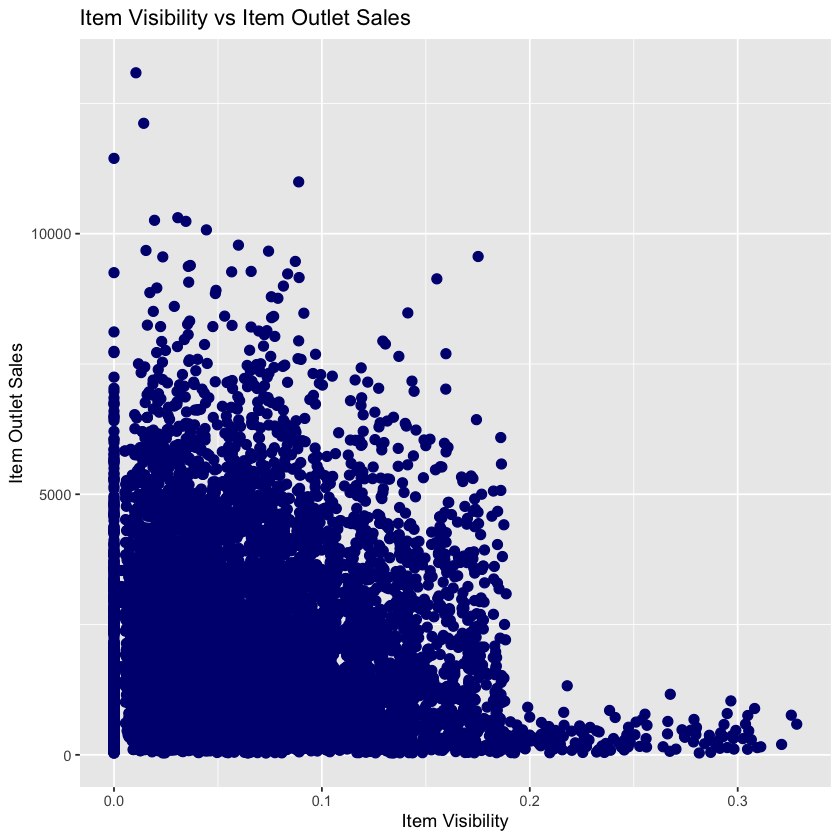

In [10]:
library(ggplot2)
ggplot(train, aes(x= Item_Visibility, y = Item_Outlet_Sales)) +
    geom_point(size = 2.5, color="navy") +
    xlab("Item Visibility") +
    ylab("Item Outlet Sales") +
    ggtitle("Item Visibility vs Item Outlet Sales")

Here we can see that the majority of the sales occured when the `Item_Visibility` is less than 0.2.

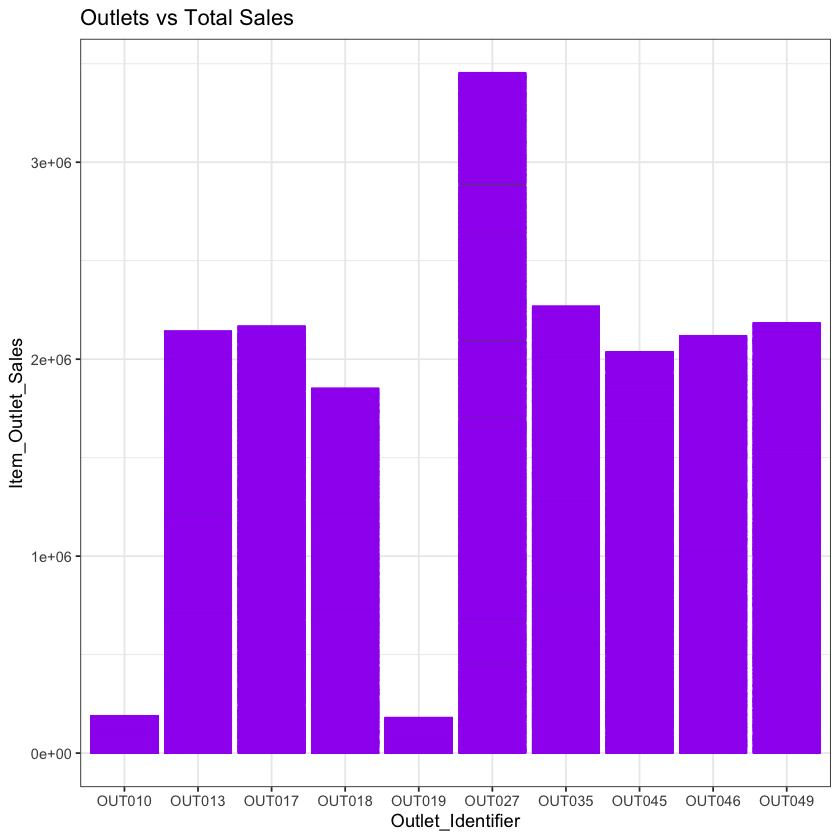

In [11]:
ggplot(train, aes(Outlet_Identifier, Item_Outlet_Sales)) +
    geom_bar(stat = "identity", color = "purple") +
    theme(axis.text.x = element_text(angle = 70, vjust = 0.5, color = "black")) +
    ggtitle("Outlets vs Total Sales") +
    theme_bw()

In this histogram plot we can see that the majority of sales occured at the outlet `OUT027`.

Let's see what items move the most.

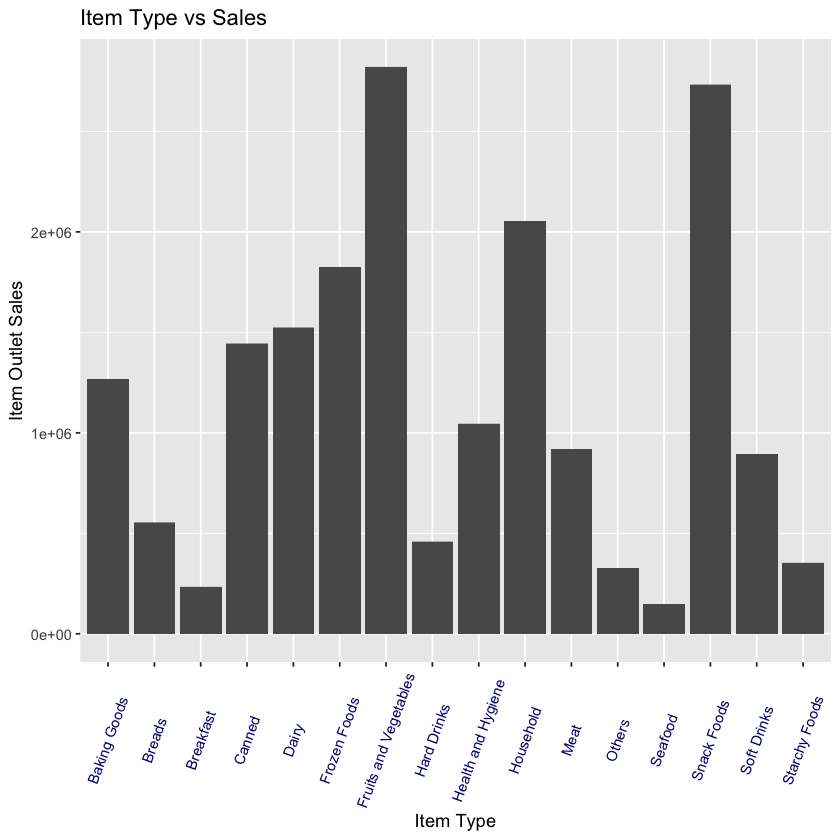

In [12]:
ggplot(train, aes(Item_Type, Item_Outlet_Sales)) +
    geom_bar( stat = "identity") +
    theme(axis.text.x = element_text(angle = 70, vjust = 0.5, color = "navy")) +
    xlab("Item Type") +
    ylab("Item Outlet Sales") +
    ggtitle("Item Type vs Sales")

This shows us that the `Fruits and Vegetables` item sells the most, followed closely by `Snack Foods`.

We can also show this information using a box chart. The advantage of a box chart is that it will show us the outlier and mean deviation for the levels of the variable.

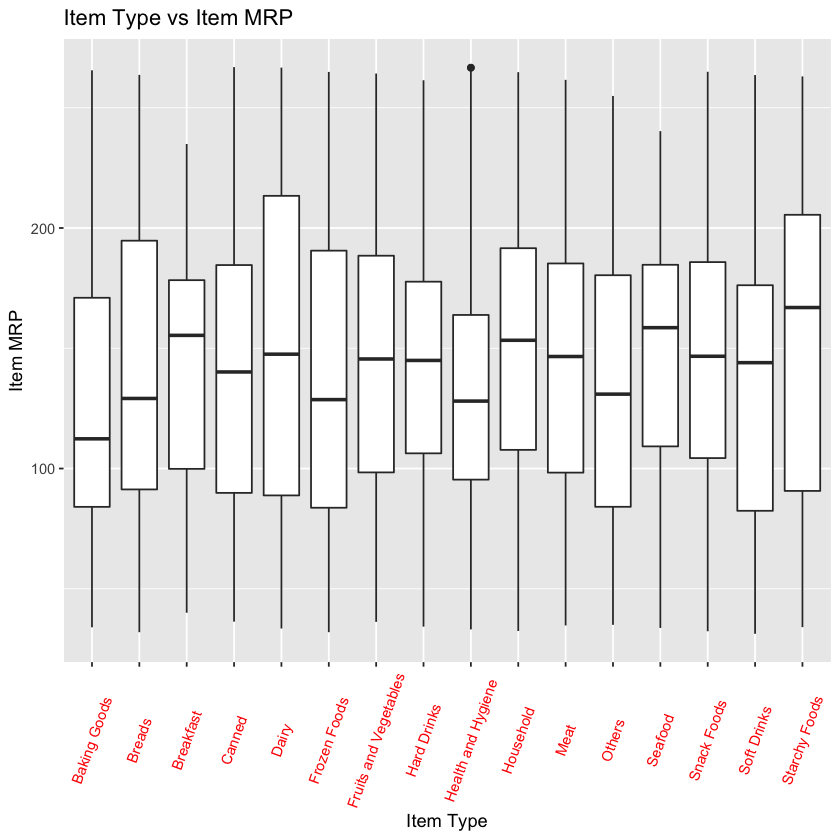

In [13]:
ggplot(train, aes(Item_Type, Item_MRP)) +
    geom_boxplot() +
    ggtitle("Box Plot") +
    theme(axis.text.x = element_text(angle = 70, vjust = 0.5, color = "red")) +
    xlab("Item Type") +
    ylab("Item MRP") +
    ggtitle("Item Type vs Item MRP")

The black point you see, is an outlier. The mid line you see in the box is the mean value of each item type.

# Data Cleaning

We need to prepare the data for use inside our models. The first thing we need to do is to combine the two data sets so that we can work with them together.

First lets add the dependent variable `Item_Outlet_Sales` to the test data set. We will set feature value to 1 for all instances in the test data set.

In [14]:
test$Item_Outlet_Sales <- 1

Now combine the train and test data sets.

In [15]:
combined <- rbind(train, test)

For the `Item_Weight` feature we will use the median value from the feature as the value to replace missing values.

In [16]:
combined$Item_Weight[is.na(combined$Item_Weight)] <- median(combined$Item_Weight, na.rm = TRUE)

Now let's verify that there are no more missing values.

In [17]:
table(is.na(combined$Item_Weight))


FALSE 
14204 

There are values in the `Item_Visibility` feature which are zero. This is impossible, so we will also replace that value with the mean.

In [18]:
combined$Item_Visibility <- ifelse(combined$Item_Visibility == 0,
                                   median(combined$Item_Visibility),
                                   combined$Item_Visibility)

The feature `Outlet_Size` is missing a level name.

In [19]:
levels(combined$Outlet_Size)

[1] ""       "High"   "Medium" "Small"

Let's mark that as "Other".

In [20]:
levels(combined$Outlet_Size)[1] <- "Other"

Let's fix the mismatched levels for the `Item_Fat_Content` feature.

In [21]:
library(plyr)
combined$Item_Fat_Content <- revalue(combined$Item_Fat_Content, c("LF" = "Low Fat", "reg" = "Regular"))
combined$Item_Fat_Content <- revalue(combined$Item_Fat_Content, c("low fat" = "Low Fat"))
table(combined$Item_Fat_Content)


Low Fat Regular 
   9185    5019 

# Feature Engineering

Let's create a new feature from the data set. This feature is the number of years the outlet has been in operation til 2019.

In [22]:
combined$Years_Operation <- 2019 - combined$Outlet_Establishment_Year

Let's get rid of unneeded features

In [23]:
suppressMessages(library(dplyr))
combined <- select(combined, -c(Item_Identifier, Outlet_Identifier, Outlet_Establishment_Year))

Let's break out the data sets back into training and testing sets.

In [24]:
new_train <- combined[1:nrow(train),]
new_test <- combined[-(1:nrow(test)),]

# Using the Linear Regression Model

Now let's train a linear regression model

In [25]:
linear_model <- lm(Item_Outlet_Sales ~ ., data = new_train)
summary(linear_model)


Call:
lm(formula = Item_Outlet_Sales ~ ., data = new_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4336.2  -680.8   -89.8   568.3  7946.1 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -768.50172  364.63717  -2.108 0.035097 *  
Item_Weight                      -0.51139    2.91490  -0.175 0.860738    
Item_Fat_ContentRegular          40.50509   28.23186   1.435 0.151401    
Item_Visibility                -255.77401  263.78199  -0.970 0.332253    
Item_TypeBreads                   5.25222   84.04714   0.062 0.950173    
Item_TypeBreakfast                6.26997  116.59546   0.054 0.957115    
Item_TypeCanned                  25.28447   62.76864   0.403 0.687091    
Item_TypeDairy                  -41.05177   62.22667  -0.660 0.509456    
Item_TypeFrozen Foods           -28.00838   58.86986  -0.476 0.634252    
Item_TypeFruits and Vegetables   29.84893   54.95872   0.543 0.587065    
Item_TypeHard Dr

Now let's check out the regression plots.

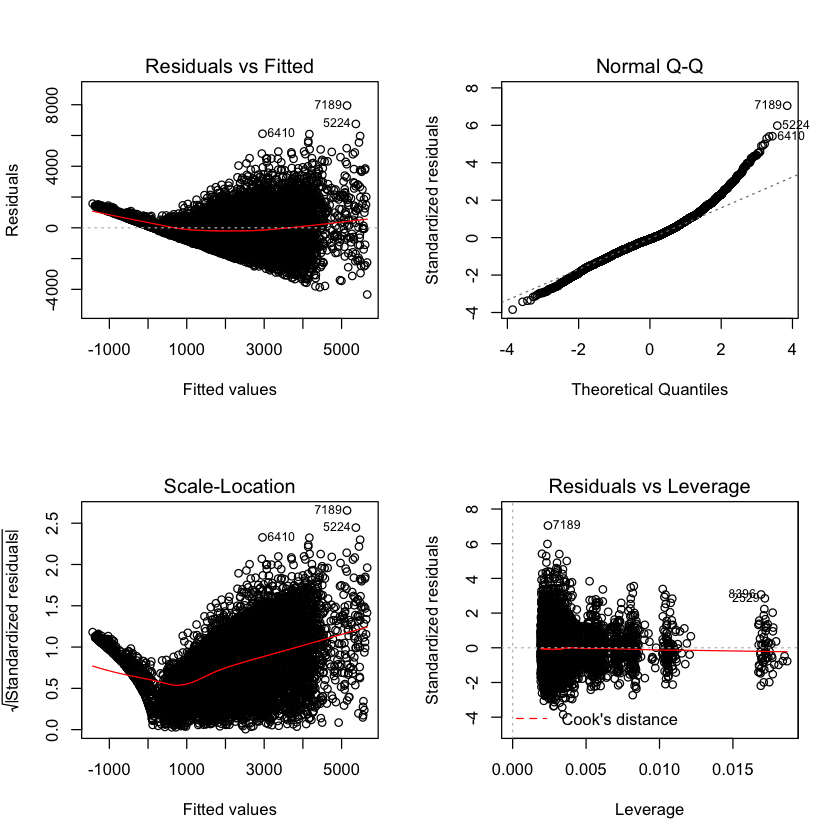

In [26]:
par(mfrow=c(2,2))
plot(linear_model)

If you check out the Residuals vs Fitted graph, you can see that it's shape is a funnel. This suggests that our model sufferes from heteroskedasticity. Heteroskedasicity refers to the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it.

To fix this, we can take the log of the response variable.

In [27]:
linear_model <- lm(log(Item_Outlet_Sales) ~ ., data = new_train)
summary(linear_model)


Call:
lm(formula = log(Item_Outlet_Sales) ~ ., data = new_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.30630 -0.29386  0.06823  0.37926  1.35991 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     4.853e+00  1.737e-01  27.940  < 2e-16 ***
Item_Weight                    -4.195e-04  1.388e-03  -0.302  0.76254    
Item_Fat_ContentRegular         1.359e-02  1.345e-02   1.011  0.31208    
Item_Visibility                -3.162e-02  1.256e-01  -0.252  0.80129    
Item_TypeBreads                 2.819e-02  4.003e-02   0.704  0.48137    
Item_TypeBreakfast             -6.944e-02  5.554e-02  -1.250  0.21120    
Item_TypeCanned                 2.532e-02  2.990e-02   0.847  0.39712    
Item_TypeDairy                 -6.904e-02  2.964e-02  -2.329  0.01987 *  
Item_TypeFrozen Foods          -5.422e-02  2.804e-02  -1.934  0.05318 .  
Item_TypeFruits and Vegetables -4.600e-03  2.618e-02  -0.176  0.86051    
I

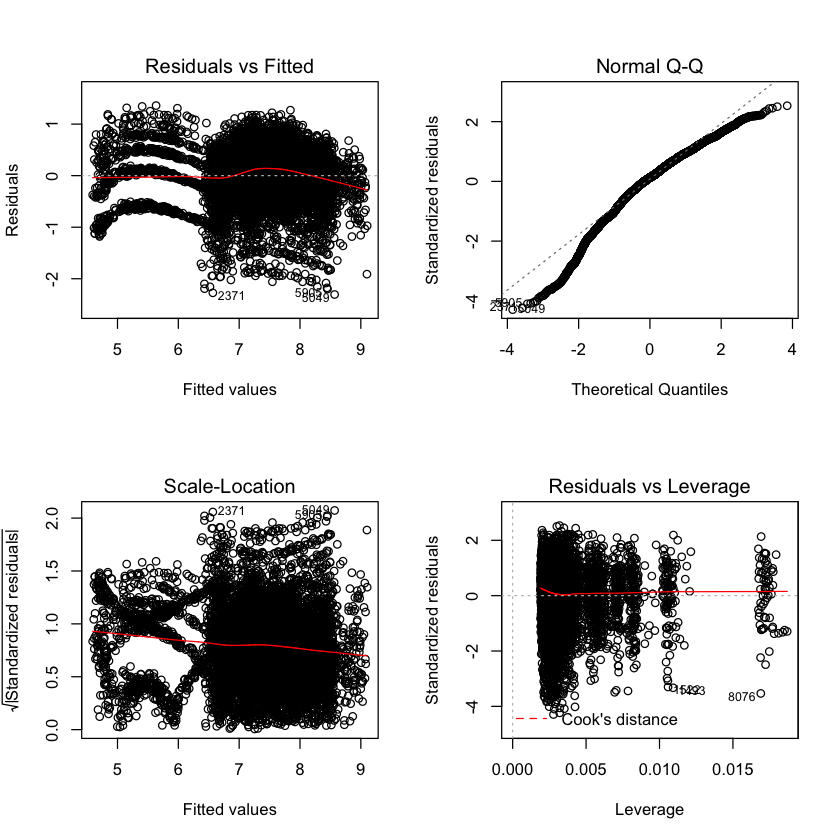

In [28]:
par(mfrow=c(2,2))
plot(linear_model)

The model can be further improved by detecting outliers and high leverage points.

Let's check out the RMSE so that we can compare this with other algorithms demonstrated below.

In [29]:
library(Metrics)
rmse(new_train$Item_Outlet_Sales, exp(linear_model$fitted.values))

[1] 1140.004

# Decision Trees

In R, the decision tree algorithm is implemented using the `rpart` package. In addition we will use the caret package to do cross vaildation. Cross validation is a technique to build robust models which are not prone to overfitting.

In R, a decision tree uses a complexity parameter (cp). It measures the tradeoff between model complexity and accuracy on training set. A smaller cp will lead to a bigger tree, which might overfit the model. Conversely, a large cp might underfit the model. Underfitting happens when the model does not capture underlying trends properly. Let's find out the optimum cp value for our model with 5 fold cross validation.

In [30]:
suppressMessages(library(rpart))
suppressMessages(library(e1071))
suppressMessages(library(rpart.plot))
suppressMessages(library(caret))

fitControl <- trainControl(method = "cv", number = 5)
cartGrid <- expand.grid(.cp=(1:50)*0.01)

tree_model <- train(Item_Outlet_Sales ~ .,
                    data = new_train,
                    method = "rpart",
                    trControl = fitControl,
                    tuneGrid = cartGrid)

print(tree_model)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


CART 

8523 samples
   9 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6819, 6818, 6819, 6817, 6819 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE      
  0.01  1124.671  0.5657494   809.2435
  0.02  1175.562  0.5252718   862.1402
  0.03  1192.444  0.5118359   873.8836
  0.04  1254.418  0.4593885   948.2810
  0.05  1254.418  0.4593885   948.2810
  0.06  1316.985  0.4042044  1019.8759
  0.07  1316.985  0.4042044  1019.8759
  0.08  1378.089  0.3460515  1061.6143
  0.09  1483.376  0.2451298  1127.1928
  0.10  1491.903  0.2361081  1131.6698
  0.11  1491.903  0.2361081  1131.6698
  0.12  1491.903  0.2361081  1131.6698
  0.13  1491.903  0.2361081  1131.6698
  0.14  1491.903  0.2361081  1131.6698
  0.15  1491.903  0.2361081  1131.6698
  0.16  1491.903  0.2361081  1131.6698
  0.17  1491.903  0.2361081  1131.6698
  0.18  1491.903  0.2361081  1131.6698
  0.19  1491.903  0.2361081  1131.6698
  0.20  1491.903  0.2361081

The final value for cp = 0.1. You can also check the table populated in console for more information. The model with cp = 0.01 has the least RMSE. Let's now build a decision tree with 0.01 as the complexity parameter.

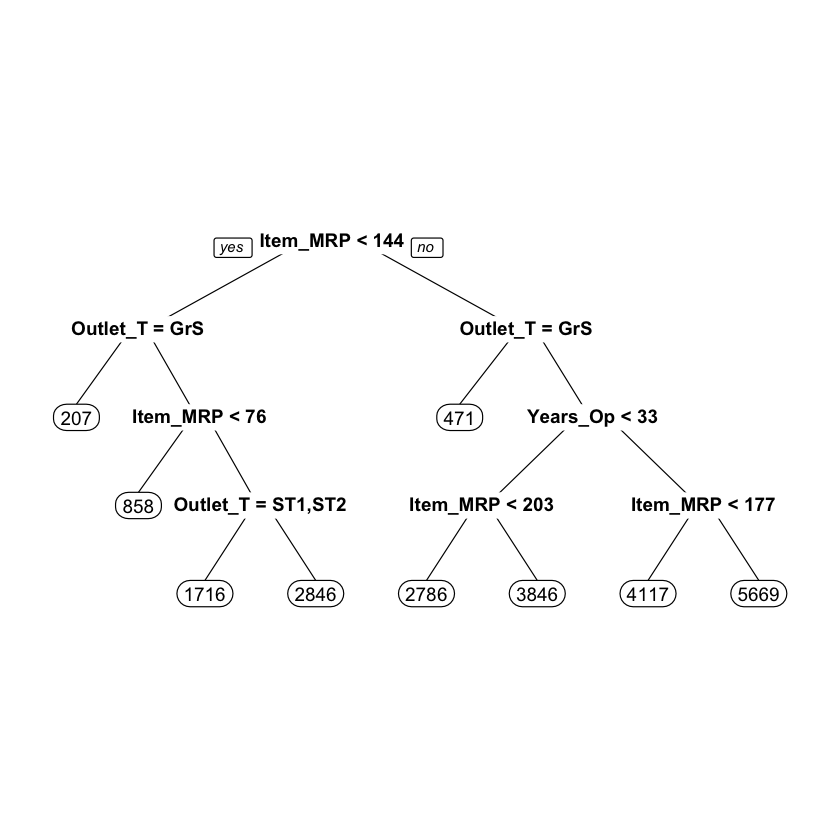

In [31]:
main_tree <- rpart(Item_Outlet_Sales ~ .,
                   data = new_train,
                   control = rpart.control(cp=0.01))
prp(main_tree)

This is the decision tree of our model. The variable `Item_MRP` has been identified as the most important feature and it is why it is placed at the root of the tree.

Let's check out the RMSE value of the model.

In [32]:
pre_score <- predict(main_tree, type = "vector")
rmse(new_train$Item_Outlet_Sales, pre_score)

[1] 1102.774

This shows that our RMSE value has improved using a decision tree model.

# Random Forest

Random Forest is a powerful algorithm which holistically takes care of missing values, outliers, and other non-linearities in the data set. It's simply a collection of classification trees, hence the name "forest".

For this problem we will focus on two parameters of random forest. `mtry` and `ntree`. `ntree` is the number of trees to be grown in the forest. `mtry` is the number of variables taken to each node to build a tree. We will do a 5 fold cross validation.

In [33]:
#suppressMessages(library(randomForest))
#control <- trainControl(method = "cv", number = 5)
#rf.model <- train(Item_Outlet_Sales ~ .,
#                  data = new_train,
#                  method = "rf",
#                  trControl = control,
#                  prox = TRUE,
#                  allowParallel = FALSE)
#print(rf.model)

If you notice, you’ll see I’ve used method = “parRF”. This is parallel random forest. This is parallel implementation of random forest. This package causes your local machine to take less time in random forest computation. Alternatively, you can also use method = “rf” as a standard random forest function.

Now that we got the `mtry` value as 15, let's use 1000 trees for the computation.

In [34]:
#forest_model <- randomForest(Item_Outlet_Sales ~ .,
#                             data = new_train,
#                             mtry = 8,
#                             ntree = 1000)
#print(forest_model)
#varImpPlot(forest_model)

This is the end.